In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import util as UT
import catalog as Cat
import evolver as Evo
import observables as Obvs
import test_evolver as testEvo

In [2]:
theta = Evo.defaultTheta('random_step_abias')
for key in theta.keys(): 
    print key, theta[key]

gv {'slope': 1.03, 'fidmass': 10.5, 'offset': -0.02}
fq {'name': 'cosmos_tinker'}
sfms {'mslope': 0.53, 'name': 'linear', 'zslope': 1.05}
fpq {'slope': -2.079703, 'fidmass': 10.5, 'offset': 1.6153725}
sfh {'sigma_tot': 0.3, 'dt_min': 1.0, 'sigma_corr': 0.2, 'name': 'random_step_abias', 'dt_max': 1.0}
mass {'f_retain': 0.6, 't_step': 0.05, 'solver': 'euler'}


In [3]:
sig_smhm = 0.2
nsnap0=15

### If there's no assembly bias then it should be the same as random steps
First SFH = `random step`, which has no assembly bias by construction

evolver.py:313: RuntimeWarning: invalid value encountered in divide
  qf.model(mf[0], z_i, lit=theta_fq['name']) * dmf_dt[1] / mf[1])
evolver.py:325: RuntimeWarning: invalid value encountered in less
  quenches = np.where(rand_Pq < Pq_Msham)  # these SFing galaxies quench
evolver.py:318: RuntimeWarning: divide by zero encountered in divide
  Pq_M_fid_interp(mm) / (1. - qf.model(mm, z_i, lit=theta_fq['name']))
evolver.py:313: RuntimeWarning: divide by zero encountered in divide
  qf.model(mf[0], z_i, lit=theta_fq['name']) * dmf_dt[1] / mf[1])


assignSFRs takes  0.771469116211
37.8304598331


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


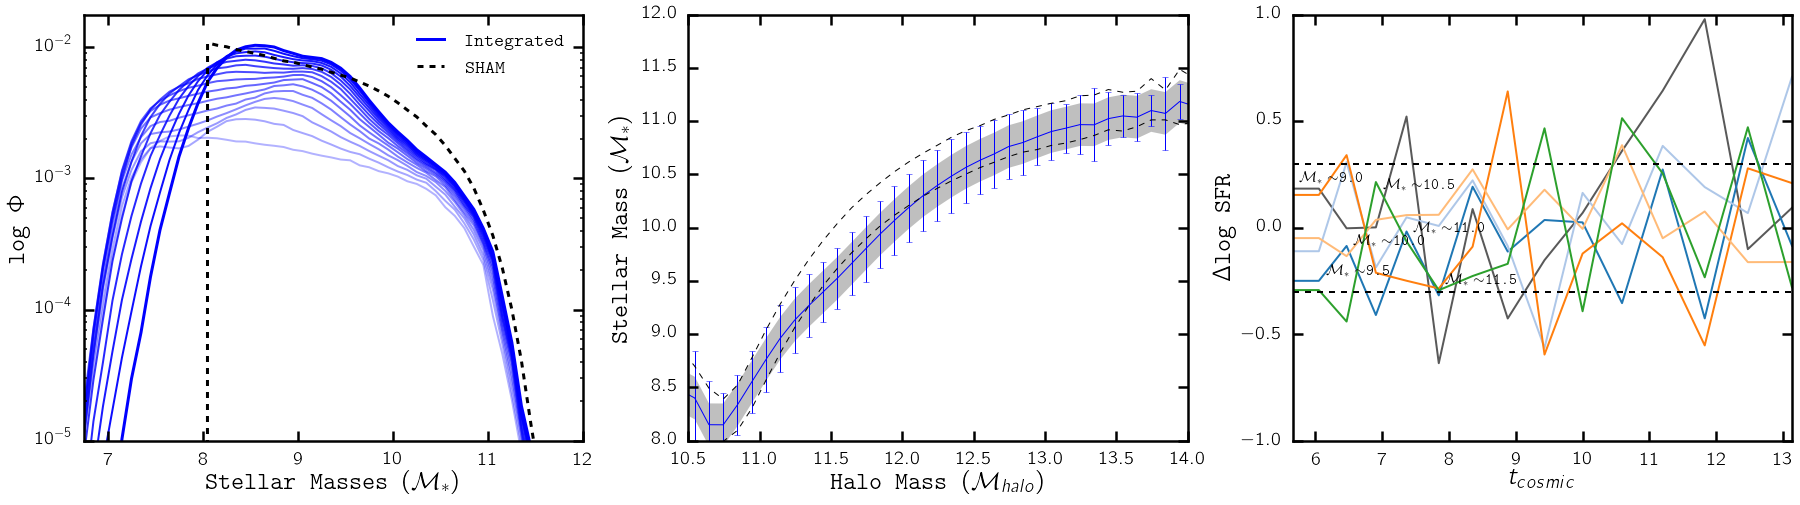

In [4]:
# random step (NO ASSEMBLY BIAS)
theta['sfh'] = {'name': 'random_step', 'dt_min': 0.5, 'dt_max': 0.5, 'sigma': 0.3}
subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

testEvo.EvolverQAplots(subcat, theta)
plt.show()

some troubleshooting

0.299698505813


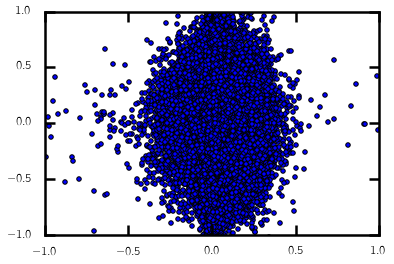

In [12]:
isSF = np.where((subcat['gclass'] == 'star-forming') & (subcat['nsnap_start'] >= 11))[0]
logSFR = Obvs.SSFR_SFMS(subcat['snapshot10_m.star'][isSF], UT.z_nsnap(10), theta_SFMS=theta['sfms']) + subcat['snapshot10_m.star'][isSF]
plt.scatter(subcat['snapshot10_halo.m'][isSF] - subcat['snapshot11_halo.m'][isSF], subcat['snapshot10_sfr'][isSF] - logSFR)
print np.std(subcat['snapshot10_sfr'][isSF] - logSFR)
plt.ylim([-1., 1.])
plt.xlim([-1., 1.])
plt.show()

`random_step_abias` with $\sigma_{corr} = 0$

In [ ]:
# random step with ASSEMBLY BIAS set to 0 
theta['sfh'] = {'name': 'random_step_abias', 'sigma_tot': 0.3, 'sigma_corr': 0.0, 'dt_min': 0.5, 'dt_max': 0.5, 'sigma': 0.3}
subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

testEvo.EvolverQAplots(subcat, theta)
plt.show()

### Now we crank up the assembly bias

In [ ]:
# random step with ASSEMBLY BIAS set to max
theta['sfh'] = {'name': 'random_step_abias', 'sigma_tot': 0.3, 'sigma_corr': 0.3, 'dt_min': 0.5, 'dt_max': 0.5, 'sigma': 0.3}
subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

testEvo.EvolverQAplots(subcat, theta)
plt.show()

### Lets check if assembly bias is being induced properly

In [ ]:
# lets change around sigma_corr (the correlation between dMhalo and dlogSFR)
for sig in [0., 0.1]:#, 0.2, 0.3]: 
    theta['sfh']['sigma_corr'] = sig
    
    subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
    subcat = subhist.Read()
    
    eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
    eev.Initiate()
    
    eev.Evolve()
    subcat = eev.SH_catalog
    
    testEvo.EvolverQAplots(subcat, theta)
plt.show()

In [ ]:
# random step with ASSEMBLY BIAS set to 0 
theta['sfh'] = {'name': 'random_step_abias', 'sigma_tot': 0.3, 'sigma_corr': 0.0, 'dt_min': 0.5, 'dt_max': 0.5}

subhist = Cat.PureCentralHistory(sigma_smhm=sig_smhm, nsnap_ancestor=nsnap0)
subcat = subhist.Read()

eev = Evo.Evolver(subcat, theta, nsnap0=nsnap0)
eev.Initiate()

eev.Evolve()
subcat = eev.SH_catalog

In [ ]:
isSF = np.where((subcat['gclass'] == 'star-forming') & (subcat['nsnap_start'] >= 11))[0]
plt.scatter(subcat['snapshot10_halo.m'][isSF] - subcat['snapshot11_halo.m'][isSF], subcat['snapshot11_sfr'][isSF])
sfrs = subcat['snapshot11_sfr'][isSF]
print sfrs[np.where(sfrs < -10)]
plt.ylim([-10., 10.])
plt.xlim([-1., 1.])
plt.show()

In [ ]:
print isSF[np.where(sfrs < -10)[0][1]]

In [ ]:
print subcat['nsnap_start'][64]
for i in range(2, 14): 
    print i, subcat['snapshot'+str(i)+'_m.star'][64], subcat['snapshot'+str(i)+'_sfr'][64], subcat['snapshot'+str(i)+'_halo.m'][64], subcat['snapshot'+str(i)+'_m.sham'][64]

In [ ]:
for i in range(2, 14): 
    print subcat['snapshot'+str(i)+'_sfr'][np.where(subcat['nsnap_start'] == i)]

In [ ]:
k